## Imports

In [1]:
import pandas as pd
from MainPackage import MixtureModelBernoulli
import numpy as np
import matplotlib.pyplot as plt

# Run model

In [2]:
num_classes = 2
random_state = 100


# Testing List
X_list = [[1,0,1,0],
          [0,1,0,1],
          [1,0,1,0]]
C_list = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=0,
                               max_iter=1000)
C_list.fit(X_list)

# Analyze Convergence for thetas

(999, 2, 4)


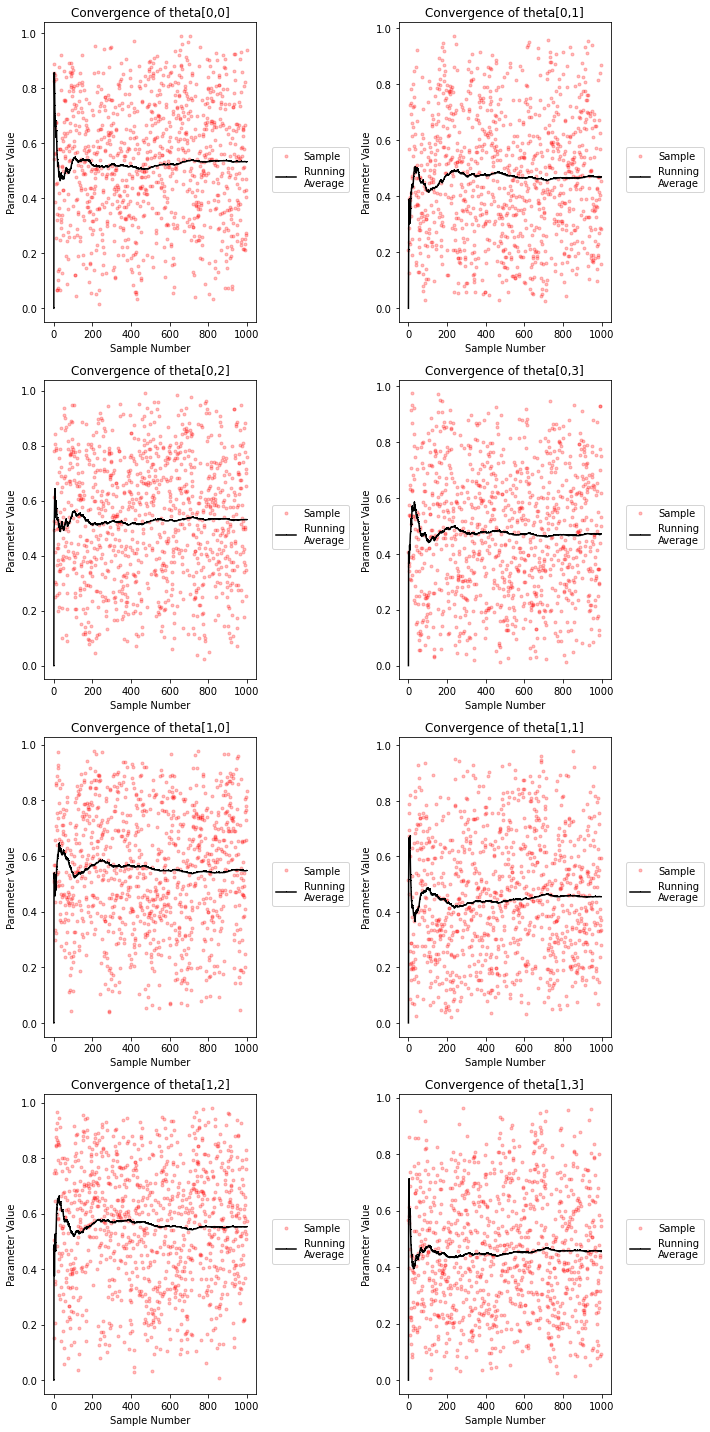

In [3]:
samples_theta_params = C_list.samples_theta_params
print(samples_theta_params.shape)
num_plot = 1
number_of_rows = int(np.ceil(samples_theta_params.shape[2]*samples_theta_params.shape[1]/2))
if(number_of_rows>15):
    raise ValueError("Too many rows. Edit the code to max out")
plt.figure(figsize=(10,20))
for c in range(samples_theta_params.shape[1]):
    for j in range(samples_theta_params.shape[2]):
        running_avg = np.zeros(samples_theta_params.shape[0])
        for num_sample in range(1,samples_theta_params.shape[0]):
            running_avg[num_sample] = np.average(samples_theta_params[:num_sample, c, j])

        plt.subplot(number_of_rows,2,num_plot)
        plt.plot(samples_theta_params[:, c, j], ".r", label="Sample",alpha=.25)
        plt.plot(running_avg, "-k,", label="Running\nAverage")
        plt.xlabel("Sample Number")
        plt.ylabel("Parameter Value")
        plt.title(f"Convergence of theta[{c},{j}]")
        plt.legend(bbox_to_anchor = (1.05, 0.6))
        num_plot += 1
plt.tight_layout()

# Convergence Analysis for k

(999, 3)


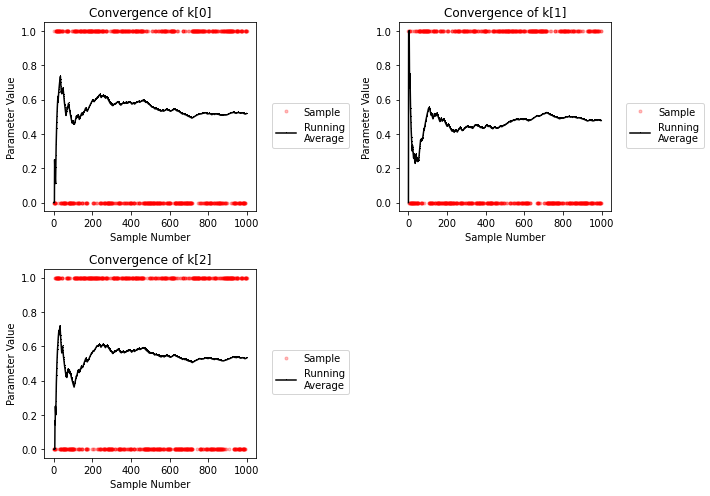

In [4]:
samples_class_assignments = C_list.samples_class_assignments
print(samples_class_assignments.shape)
num_plot = 1
number_of_rows = int(np.ceil(samples_class_assignments.shape[1]/2))
if(number_of_rows>15):
    raise ValueError("Too many rows. Edit the code to max out")
plt.figure(figsize=(10,7))
for i in range(samples_class_assignments.shape[1]):
    running_avg = np.zeros(samples_class_assignments.shape[0])
    for num_sample in range(1,samples_class_assignments.shape[0]):
        running_avg[num_sample] = np.average(samples_class_assignments[:num_sample, i])

    plt.subplot(number_of_rows,2,num_plot)
    plt.plot(samples_class_assignments[:, i], ".r", label="Sample",alpha=.25)
    plt.plot(running_avg, "-k,", label="Running\nAverage")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of k[{i}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    num_plot += 1
plt.tight_layout()

# Convergence Analysis for pi

(999, 2)


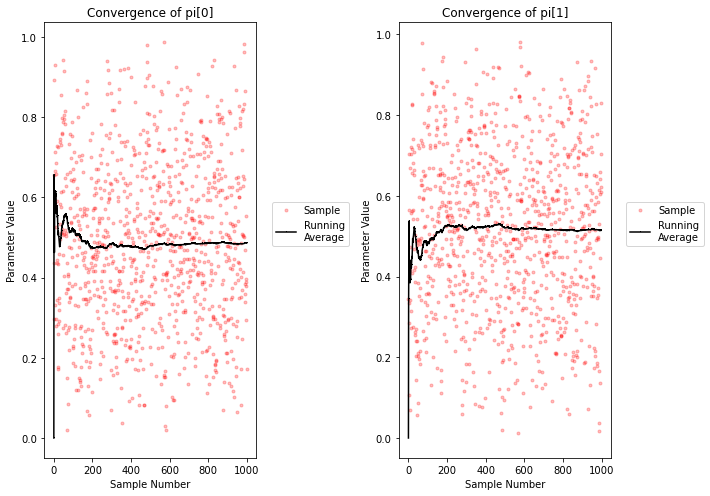

In [5]:
samples_class_probabilities = C_list.samples_class_probabilities
print(samples_class_probabilities.shape)
num_plot = 1
number_of_rows = int(np.ceil(samples_class_probabilities.shape[1]/2))
if(number_of_rows>15):
    raise ValueError("Too many rows. Edit the code to max out")
plt.figure(figsize=(10,7))
for c in range(samples_class_probabilities.shape[1]):
    running_avg = np.zeros(samples_class_probabilities.shape[0])
    for num_sample in range(1,samples_class_probabilities.shape[0]):
        running_avg[num_sample] = np.average(samples_class_probabilities[:num_sample, c])

    plt.subplot(number_of_rows,2,num_plot)
    plt.plot(samples_class_probabilities[:, c], ".r", label="Sample",alpha=.25)
    plt.plot(running_avg, "-k,", label="Running\nAverage")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of pi[{c}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    num_plot += 1
plt.tight_layout()